In [10]:
import schemdraw
import schemdraw.elements as elm

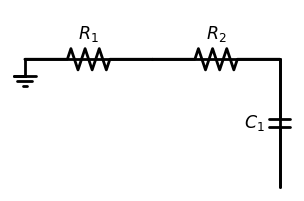

In [9]:
d = schemdraw.Drawing()
R1 = d.add(e.RES, label='$R_1$')
R2 = d.add(e.RES, d='right', label='$R_2$')
C1 = d.add(e.CAP, d='down', label='$C_1$')
#C2 = d.add(e.CAP, d='down', label='$C_2$')
#R2 = d.add(e.RES, d='right', label='$R_2$')
d.add(elm.LINE, to=C1.start)
d.add(elm.LINE, to=C2.start)
d.add(elm.LINE, to=R1.start)
d.add(elm.GND)
d.draw()

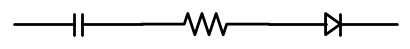

In [12]:
with schemdraw.Drawing() as d:
    d += elm.Capacitor()
    d += elm.Resistor()
    d += elm.Diode()

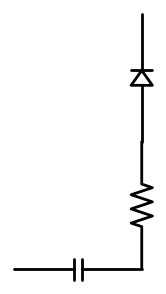

In [11]:
with schemdraw.Drawing() as d:
    d += elm.Capacitor()
    d += elm.Resistor().up()
    d += elm.Diode()

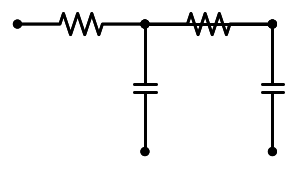

In [38]:
with schemdraw.Drawing() as d:
    
    
    with schemdraw.Drawing() as d:
    R = d.add(elm.Resistor())
    C = d.add(elm.Capacitor().up())
    Q = d.add(elm.Diode().to(R.start))
    
    d += elm.Dot()
    d += elm.Resistor()
    d += elm.Dot()
    d.push()

    d += elm.Capacitor().down()
    d += elm.Dot()
    d.pop()
    d.push()

    d += elm.Dot()
    d += elm.Resistor()
    d += elm.Dot()

    d += elm.Capacitor().down()
    d += elm.Dot()
    d.pop()
    d.push()

    d.pop()
    d += elm.Line()
    d += elm.Dot()




    # d.pop()
    # d += elm.Capacitor().down()
    # d += elm.Ground(lead=True)
    
    # d.pop()
    # d += elm.Line()

    d.draw()

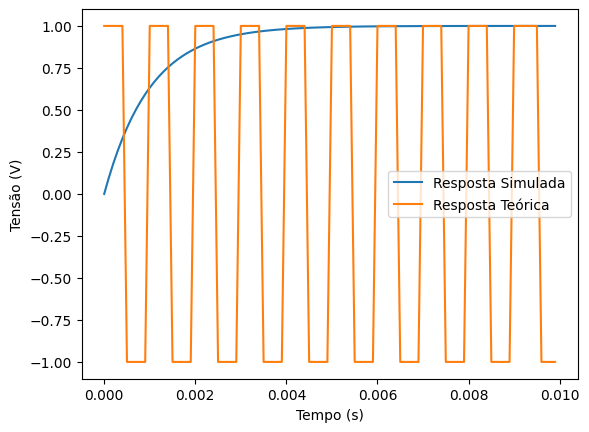

In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import control

# Definir os valores dos componentes do circuito e a função de entrada
R = 1000
C = 1e-6
Vin = signal.square(2 * np.pi * 1000 * np.arange(0, 0.01, 0.0001))

# Calcular a função transferência do sistema
s = control.TransferFunction.s
G = 1 / (R * C * s + 1)

# Criar o objeto TransferFunction usando a função transferência calculada
sys = control.TransferFunction(G.num, G.den)

# Simular o sistema e obter a resposta
t, y = control.step_response(sys, T=np.arange(0, 0.01, 0.0001))

# Plotar a resposta simulada e comparar com a resposta teórica
plt.plot(t, y)
plt.plot(t, Vin)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(['Resposta Simulada', 'Resposta Teórica'])
plt.show()

$$
E(s) = \frac{1}{1+Gc(s)G1(s)H(s)} * R(s) - \frac{G2(s)H(s)}{1+Gc(s)G1(s)H(s)}*P(s)
$$